One of the most poignant moments in the Aeneid comes at the end of book 8, when, after the description of the elaborate depiction of the history, or to Aeneas the future, of Rome on the shield his mother gave him, Vergil writes that Aeneas, ignorant of the matters, nonetheless delighted at the imago. As scholars have long observed, the shield, as an imago mundi, an imaginary representation of the world, is a metaphor for the poem that contains it. Epic, from the Iliad onward, was propelled in part by the ambition to visualize the cosmos on shields and through narrative. These imagines, of course, are phenomenologically fraught and contingent. My project constitutes a small attempt to enrich our encounters with the imagines mundi of epic by visualizing such visualizations through a series of charts and maps of place references from a few books in the Aeneid and the Iliad. 

In her beloved “Poetry,” modernist poet Marianne Moore remarked that poems are “imaginary ponds with real toads in them.” Scholars, in attempting to approach the fantasyscapes of ancient poetry, seem to me often to approach their texts in the opposite way, brushing aside the toads and trying to photograph the water lilies. They try to use the poems schematically to construct normalized, historicized geographies rather than embracing, as the poems themselves often embrace, the imaginary and fantastic contingency of the poetic landscape within which the poem sings. My hope is that an approach like this one, if developed further, might help us to untether our reading of epic space from the fetishization of geographic ontology so that each of us, though ignorant of the realities can nonetheless delight in their imagining. 


In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.lines as mlines
import csv
from pylab import rcParams
rcParams['figure.figsize'] = (8,6)
epilocs = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/maticic-del-dm3769/AeneidPlacesFinalProject/AeneidPlacesSpreadsheet.csv")
pleiades = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/maticic-del-dm3769/AeneidPlacesFinalProject/pleiades-places.csv")
conn = sqlite3.connect(':memory:')
epilocs.to_sql('epilocs', conn, if_exists='replace')
pleiades.to_sql('pleiades', conn, if_exists='replace')

In [2]:
#Creating dataframes for all the Aeneid places
allaen = pd.read_sql("""SELECT epilocs.name, epilocs.place_type, epilocs.book, epilocs.line, epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.poem = 'Aeneid')
ORDER BY epilocs.book, epilocs.line""", conn)
allaencounts = allaen.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#Iliad places
ili = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.line, epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.poem = 'Iliad')
ORDER BY epilocs.book, epilocs.line""", conn)
ilicounts = ili.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#places in Aeneid 1
aen1 = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.line, epilocs.aeneaspath, epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.book = 'Aeneid_1')
ORDER BY epilocs.book, epilocs.line""", conn)
aen1counts = aen1.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#places in the Shield of Aeneas
shield = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.line, epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.book = 'Aeneid_8')
ORDER BY epilocs.book, epilocs.line""", conn)
shieldcounts = shield.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#places in Aeneid 9
aen9 = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.line, epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.book = 'Aeneid_9')
ORDER BY epilocs.book, epilocs.line""", conn)
aen9counts = aen9.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#places in Aeneid 10
aen10 = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.aeneaspath, epilocs.line, epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.book = 'Aeneid_10')
ORDER BY epilocs.book, epilocs.line""", conn)
aen10counts = aen10.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#places in Aeneid 10 and Iliad 16
aenil = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.book, epilocs.line, epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.book = 'Aeneid_10') OR (epilocs.book = 'Iliad_16')
ORDER BY epilocs.book, epilocs.line""", conn)
aenilcounts = aenil.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#places in Aeneid 1 in Italy
aen1italy = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.line, 
epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.book = 'Aeneid_1') AND (epilocs.in_italy = 'Italy')
ORDER BY epilocs.book, epilocs.line""", conn)
aen1italycounts = aen1italy.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#places in Aeneid 9 in Italy
aen9italy = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.line, 
epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.book = 'Aeneid_9') AND (epilocs.in_italy = 'Italy')
ORDER BY epilocs.book, epilocs.line""", conn)
aen9italycounts = aen9italy.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#places in Aeneid 10 in Italy
aen10italy = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.line, 
epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.book = 'Aeneid_10') AND (epilocs.in_italy = 'Italy')
ORDER BY epilocs.book, epilocs.line""", conn)
aen10italycounts = aen10italy.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

# Map of all the places in Aeneid 1, 9, 10, and on the Shield
These three books may serve as a sample of the distribution of place references in the poem.

In [3]:
allaenmap = Basemap(projection='cass', resolution = 'i', area_thresh = 0.1, lon_0 = 42, lat_0 = 35, width = 10000000, height = 5000000)

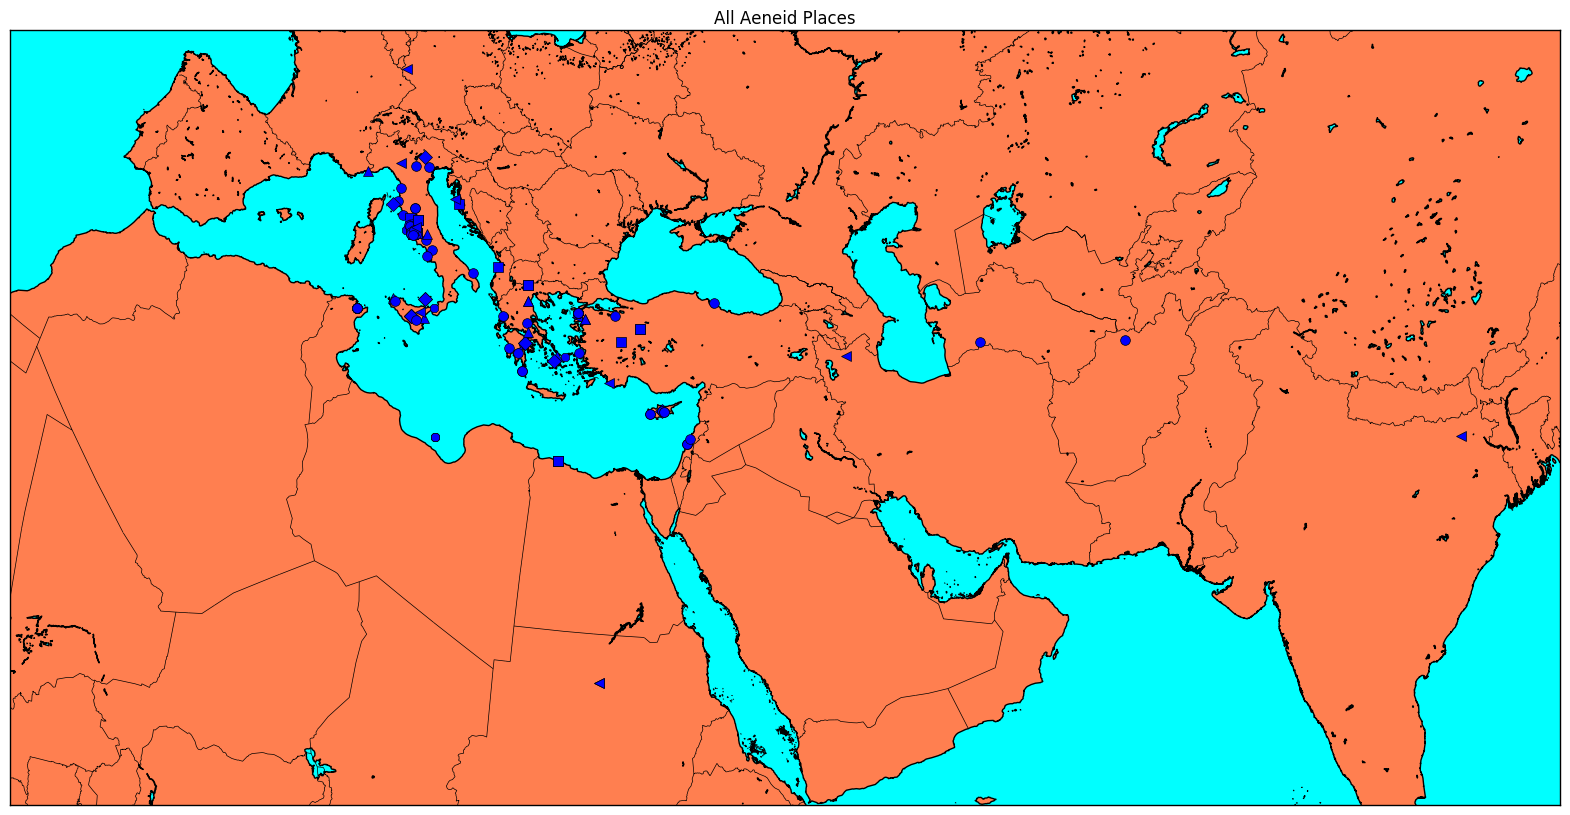

In [4]:
x, y = allaenmap(allaen['reprLong'].values, allaen['reprLat'].values)
labels = allaen['Name']
type = allaen['Place_Type']
frequency = allaencounts["count"]
for t, x, y in zip(type, x, y):
    if t == "City/Settlement":
        allaenmap.plot(x, y, marker='o', color='b', markersize=7)
    if t == "Region":
        allaenmap.plot(x, y, marker='s', color='b', markersize=7)
    if t == "Island":
        allaenmap.plot(x, y, marker='D', color='b', markersize=7)
    if t == "Mountain/Hill":
        allaenmap.plot(x, y, marker='^', color='b', markersize=7)
    if t == "River":
        allaenmap.plot(x, y, marker='<', color='b', markersize=7)
    if t == "Body_of_water":
        allaenmap.plot(x, y, marker='8', color='b', markersize=7)
    if t == "Port":
        allaenmap.plot(x, y, marker='1', color='b', markersize=7)
allaenmap.plot
allaenmap.drawcoastlines()
allaenmap.drawcountries()
allaenmap.fillcontinents(color='coral',lake_color='aqua')
allaenmap.drawmapboundary(fill_color='aqua')
plt.title("All Aeneid Places")
plt.gcf().set_size_inches(20,20)
plt.show()

# Map of Places in Aeneid 1, with closeup on Italy

In [5]:
aeneid1map = Basemap(projection='cass', resolution = 'i', area_thresh = 0.1, lon_0 = 16, lat_0 = 37.9, width = 3800000, height = 1950000)

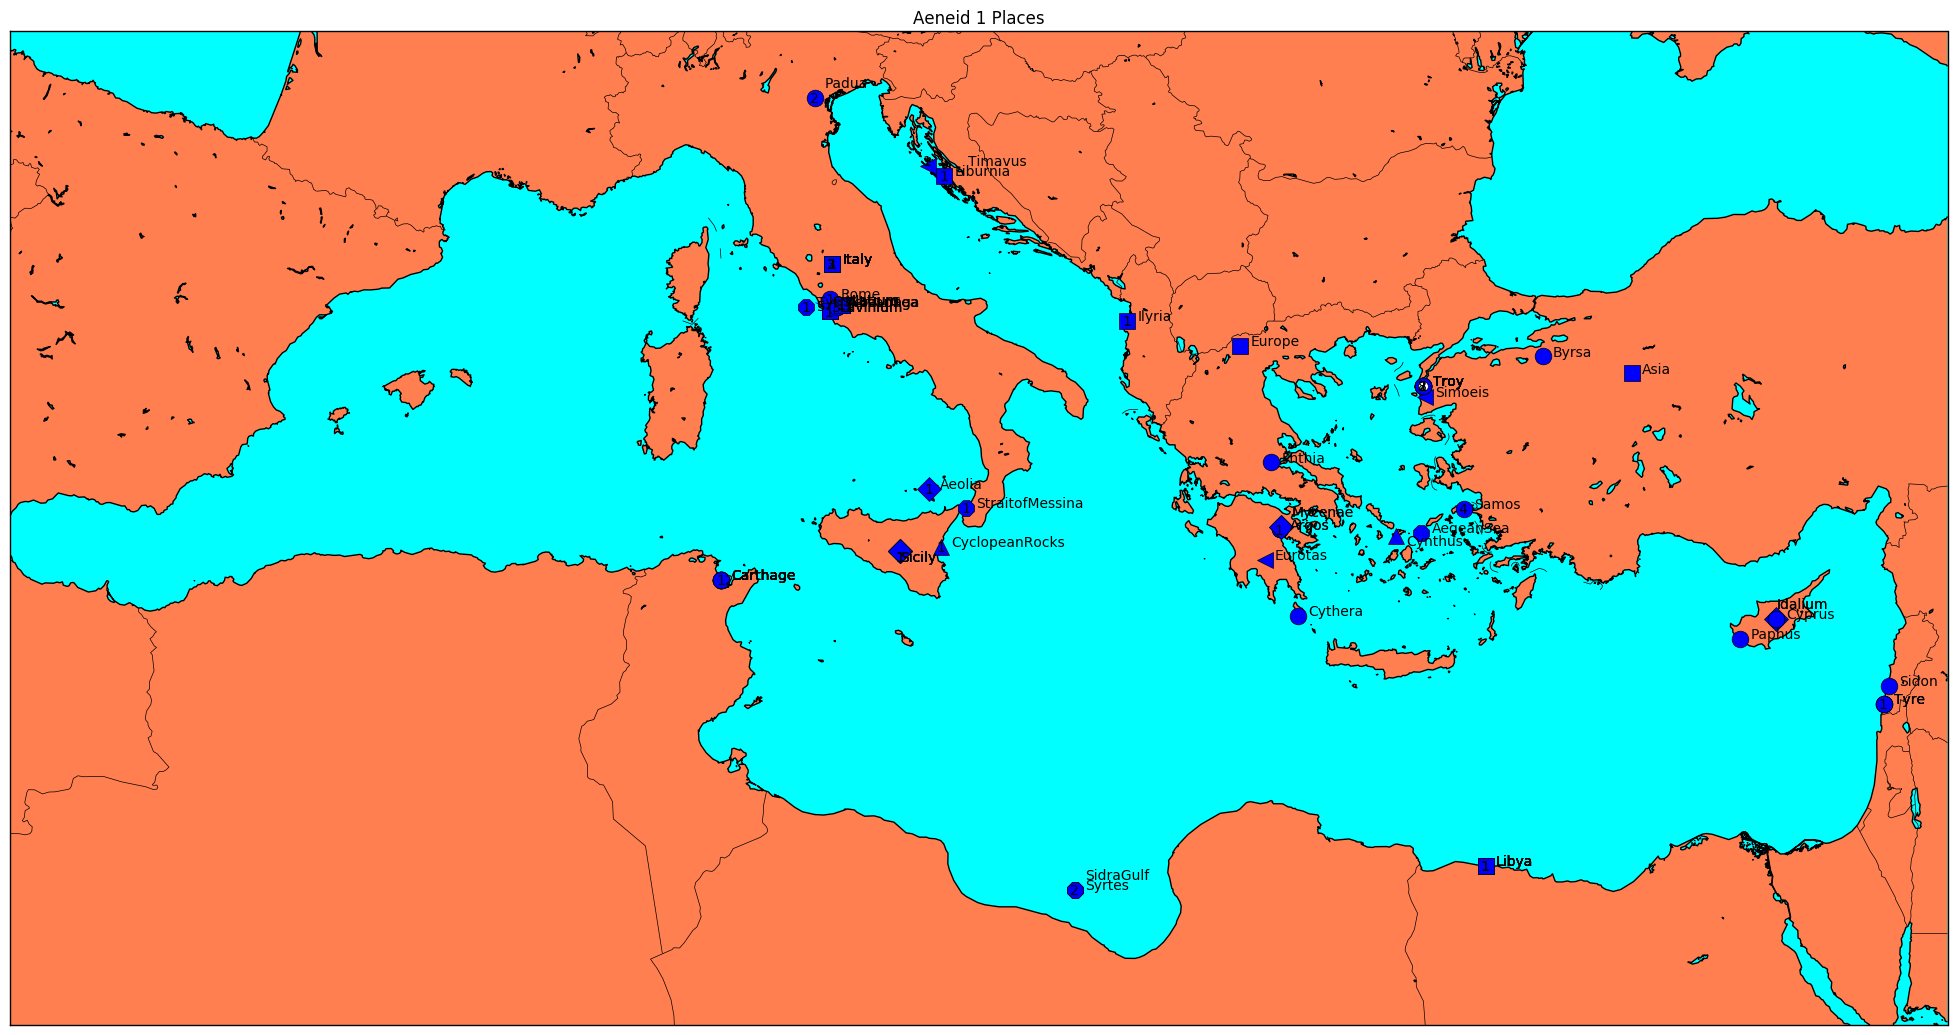

In [6]:
x, y = aeneid1map(aen1['reprLong'].values, aen1['reprLat'].values)
labels = aen1['Name']
type = aen1['Place_Type']
frequencies = aen1counts['count']
for frequency, label, xpt, ypt in zip(frequencies, labels, x, y):
    if label == 'SidraGulf':
        plt.text(xpt-10000, ypt+20000, frequency)
    elif label == 'Cynthus':
        plt.text(xpt-10000, ypt-20000, frequency)
    elif label == 'Mycenae': 
        plt.text(xpt-10000, ypt+20000, frequency)
    elif label == 'Timavus':
        plt.text(xpt-10000, ypt, frequency)
    elif label == 'Idalium':
        plt.text(xpt-10000, ypt+20000, frequency)
    elif label == 'Sicily':
        plt.text(xpt-10000, ypt-20000, frequency)
    else: 
        plt.text(xpt-10000, ypt-10000, frequency)
for label, xpt, ypt in zip(labels, x, y):
    if label == 'SidraGulf':
        plt.text(xpt+20000, ypt+20000, label)
    elif label == 'Cynthus':
        plt.text(xpt+20000, ypt-20000, label)
    elif label == 'Mycenae': 
        plt.text(xpt+20000, ypt+20000, label)
    elif label == 'Padua':
        plt.text(xpt+20000, ypt+20000, label)
    elif label == 'Timavus':
        plt.text(xpt+80000, ypt, label)
    elif label == 'Idalium':
        plt.text(xpt, ypt+20000, label)
    elif label == 'Sicily':
        plt.text(xpt, ypt-20000, label)
    else: 
        plt.text(xpt+20000, ypt, label)
for t, x, y in zip(type, x, y):
    if t == "City/Settlement":
        aeneid1map.plot(x, y, marker='o', color='b', markersize=12)
    elif t == "Region":
        aeneid1map.plot(x, y, marker='s', color='b', markersize=12)
    elif t == "Island":
        aeneid1map.plot(x, y, marker='D', color='b', markersize=12)
    elif t == "Mountain/Hill":
        aeneid1map.plot(x, y, marker='^', color='b', markersize=12)
    elif t == "River":
        aeneid1map.plot(x, y, marker='<', color='b', markersize=12)
    elif t == "Body_of_water":
        aeneid1map.plot(x, y, marker='8', color='b', markersize=12)
    elif t == "Port":
        aeneid1map.plot(x, y, marker='1', color='b', markersize=12)   
aeneid1map.plot(x, y, 'o', color='white', markersize=7)
aeneid1map.drawcoastlines()
aeneid1map.drawcountries()
aeneid1map.fillcontinents(color='coral',lake_color='aqua')
aeneid1map.drawmapboundary(fill_color='aqua')
plt.title("Aeneid 1 Places")
plt.gcf().set_size_inches(25,25)
plt.show()
fig = plt.figure()
blue_circle = mlines.Line2D([], [], color='blue', marker='o', markersize=12, label='City/Settlements')
blue_square = mlines.Line2D([], [], color='blue', marker='s', markersize=12, label='Region')
blue_diamond = mlines.Line2D([], [], color='blue', marker='D', markersize=12, label='Island')
blue_triangle_up = mlines.Line2D([], [], color='blue', marker='^', markersize=12, label='Mountain/Hill')
blue_arrow_left = mlines.Line2D([], [], color='blue', marker='<', markersize=12, label='River')
blue_octagon = mlines.Line2D([], [], color='blue', marker='8', markersize=12, label='Body of Water')
blue_tri_down = mlines.Line2D([], [], color='blue', marker='1', markersize=12, label='Port')
plt.legend(handles=[blue_circle, blue_square, blue_diamond, blue_triangle_up, blue_arrow_left, blue_octagon, blue_tri_down,])

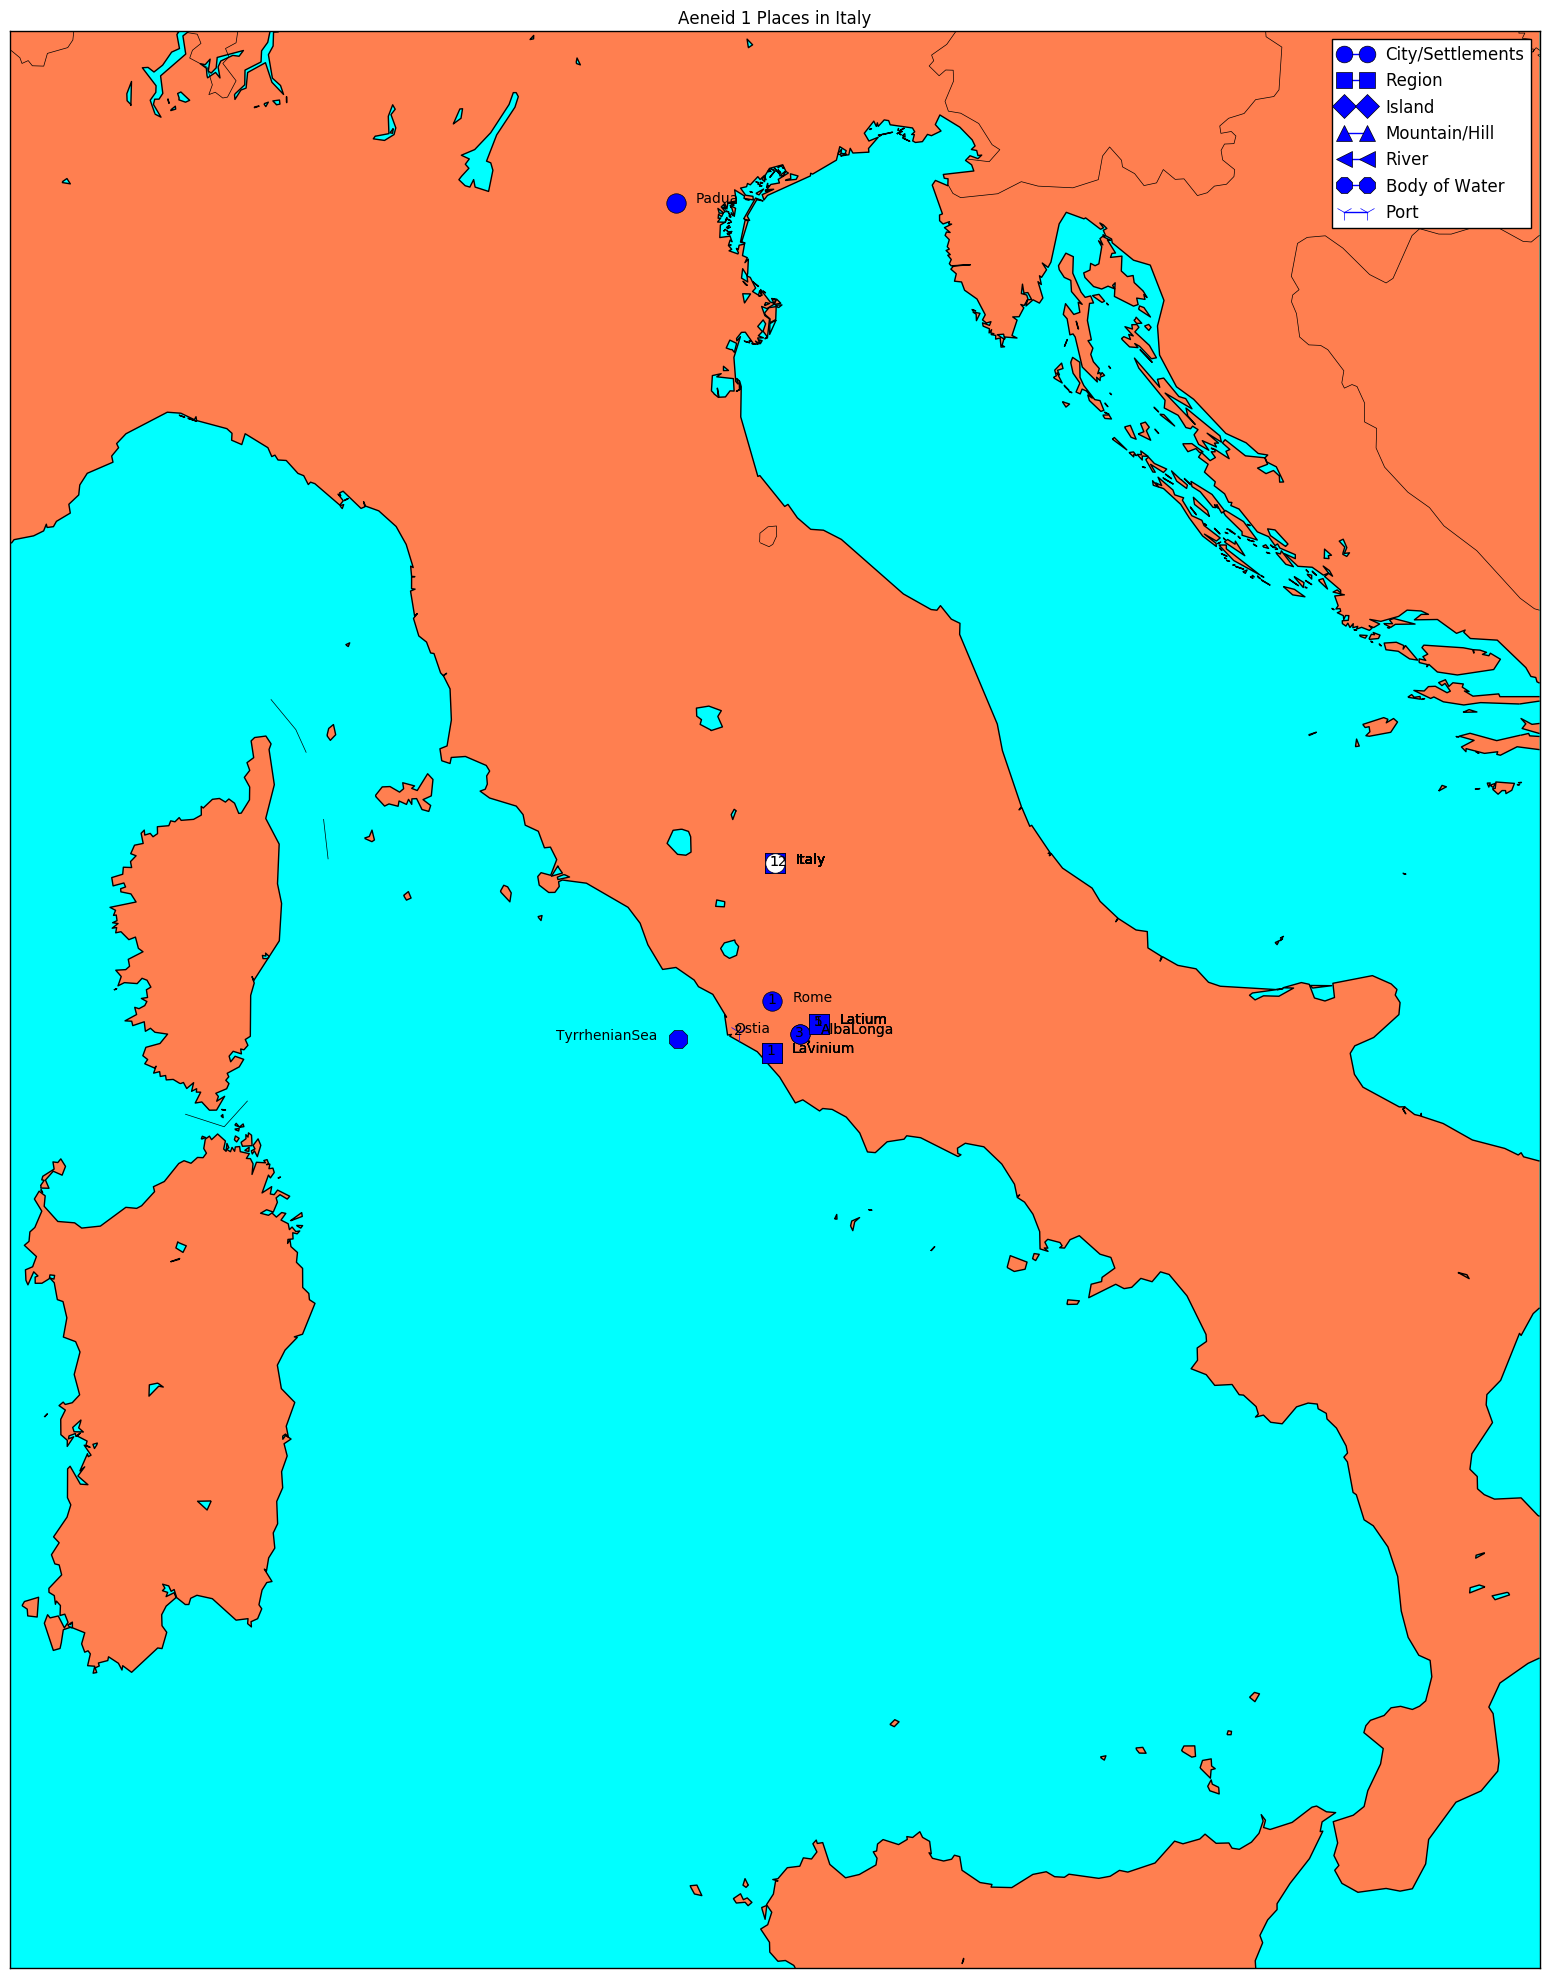

In [9]:
aen1italymap = Basemap(projection='cass', resolution = 'i', area_thresh = 0.1, lon_0 = 12.5, lat_0 = 41.9, width = 750000, height = 950000)
x, y = aen1italymap(aen1italy['reprLong'].values, aen1italy['reprLat'].values)
labels = aen1italy['Name']
type = aen1italy['Place_Type']
frequencies = aen1italycounts['count']
for frequency, label, xpt, ypt in zip(frequencies, labels, x, y):
        plt.text(xpt-2700, ypt-1000, frequency)
for label, xpt, ypt in zip(labels, x, y):
    if label == 'TyrrhenianSea':
        plt.text(xpt-60000, ypt, label)
    elif label == 'Ostia': 
        plt.text(xpt-2500, ypt, label)
    else: 
        plt.text(xpt+10000, ypt, label)
for t, x, y in zip(type, x, y):
    if t == "City/Settlement":
        aen1italymap.plot(x, y, marker='o', color='b', markersize=14)
    elif t == "Region":
        aen1italymap.plot(x, y, marker='s', color='b', markersize=14)
    elif t == "Island":
        aen1italymap.plot(x, y, marker='D', color='b', markersize=14)
    elif t == "Mountain/Hill":
        aen1italymap.plot(x, y, marker='^', color='b', markersize=14)
    elif t == "River":
        aen1italymap.plot(x, y, marker='<', color='b', markersize=14)
    elif t == "Body_of_water":
        aen1italymap.plot(x, y, marker='8', color='b', markersize=14)
    elif t == "Port":
        aen1italymap.plot(x, y, marker='1', color='b', markersize=14) 
aen1italymap.plot(x, y, 'o', color='white', markersize=14)
aen1italymap.drawcoastlines()
aen1italymap.drawcountries()
aen1italymap.fillcontinents(color='coral',lake_color='aqua')
aen1italymap.drawmapboundary(fill_color='aqua')
plt.title("Aeneid 1 Places in Italy")
plt.gcf().set_size_inches(25,25)
plt.show()
blue_circle = mlines.Line2D([], [], color='blue', marker='o', markersize=12, label='City/Settlements')
blue_square = mlines.Line2D([], [], color='blue', marker='s', markersize=12, label='Region')
blue_diamond = mlines.Line2D([], [], color='blue', marker='D', markersize=12, label='Island')
blue_triangle_up = mlines.Line2D([], [], color='blue', marker='^', markersize=12, label='Mountain/Hill')
blue_arrow_left = mlines.Line2D([], [], color='blue', marker='<', markersize=12, label='River')
blue_octagon = mlines.Line2D([], [], color='blue', marker='8', markersize=12, label='Body of Water')
blue_tri_down = mlines.Line2D([], [], color='blue', marker='1', markersize=12, label='Port')
plt.legend(handles=[blue_circle, blue_square, blue_diamond, blue_triangle_up, blue_arrow_left, blue_octagon, blue_tri_down,])

# Map of Aeneid 9, with closeup on Italy
Unsurprisingly, we find many more mention of Italian localities. 

There are a couple notable preliminary points to be made about the place names in this book. Firstly, there are noteably few (27) when compared with 1 (85) and 10 (57). Book 9 is a bit shorter than the other two, and this may have something to do with it. But it is tempting to coorelate the number of place names with the rare absence of Aeneas, who is on a mission to Evander and the Etruscans. But the most curious part of this map is rather the reference to the Ganges, which is the only time in the three books of the Aeneid surveyed here where a place of such great distance from the Mediterranean is mentioned. 

In [ ]:
aeneid9map = Basemap(projection='cass', resolution = 'i', area_thresh = 0.1, lon_0 = 42, lat_0 = 35, width = 10000000, height = 5000000)
x, y = aeneid9map(aen9['reprLong'].values, aen9['reprLat'].values)
labels = aen9['Name']
type = aen9['Place_Type']
frequencies = aen9counts['count']
for frequency, label, xpt, ypt in zip(frequencies, labels, x, y):
        plt.text(xpt-2700, ypt-1000, frequency)
for label, xpt, ypt in zip(labels, x, y):
    if label == 'TyrrhenianSea':
        plt.text(xpt-60000, ypt, label)
    elif label == 'Ostia': 
        plt.text(xpt-2500, ypt, label)
    else: 
        plt.text(xpt+10000, ypt, label)
for t, x, y in zip(type, x, y):
    if t == "City/Settlement":
        aeneid9map.plot(x, y, marker='o', color='b', markersize=14)
    elif t == "Region":
        aeneid9map.plot(x, y, marker='s', color='b', markersize=14)
    elif t == "Island":
        aeneid9map.plot(x, y, marker='D', color='b', markersize=14)
    elif t == "Mountain/Hill":
        aeneid9map.plot(x, y, marker='^', color='b', markersize=14)
    elif t == "River":
        aeneid9map.plot(x, y, marker='<', color='b', markersize=14)
    elif t == "Body_of_water":
        aeneid9map.plot(x, y, marker='8', color='b', markersize=14)
    elif t == "Port":
        aeneid9map.plot(x, y, marker='1', color='b', markersize=14) 
aeneid9map.plot(x, y, 'o', color='white', markersize=14)
aeneid9map.drawcoastlines()
aeneid9map.drawcountries()
aeneid9map.fillcontinents(color='coral',lake_color='aqua')
aeneid9map.drawmapboundary(fill_color='aqua')
plt.title("Aeneid 9 Places")
plt.gcf().set_size_inches(15, 15)
plt.show()
blue_circle = mlines.Line2D([], [], color='blue', marker='o', markersize=12, label='City/Settlements')
blue_square = mlines.Line2D([], [], color='blue', marker='s', markersize=12, label='Region')
blue_diamond = mlines.Line2D([], [], color='blue', marker='D', markersize=12, label='Island')
blue_triangle_up = mlines.Line2D([], [], color='blue', marker='^', markersize=12, label='Mountain/Hill')
blue_arrow_left = mlines.Line2D([], [], color='blue', marker='<', markersize=12, label='River')
blue_octagon = mlines.Line2D([], [], color='blue', marker='8', markersize=12, label='Body of Water')
blue_tri_down = mlines.Line2D([], [], color='blue', marker='1', markersize=12, label='Port')
plt.legend(handles=[blue_circle, blue_square, blue_diamond, blue_triangle_up, blue_arrow_left, blue_octagon, blue_tri_down,])

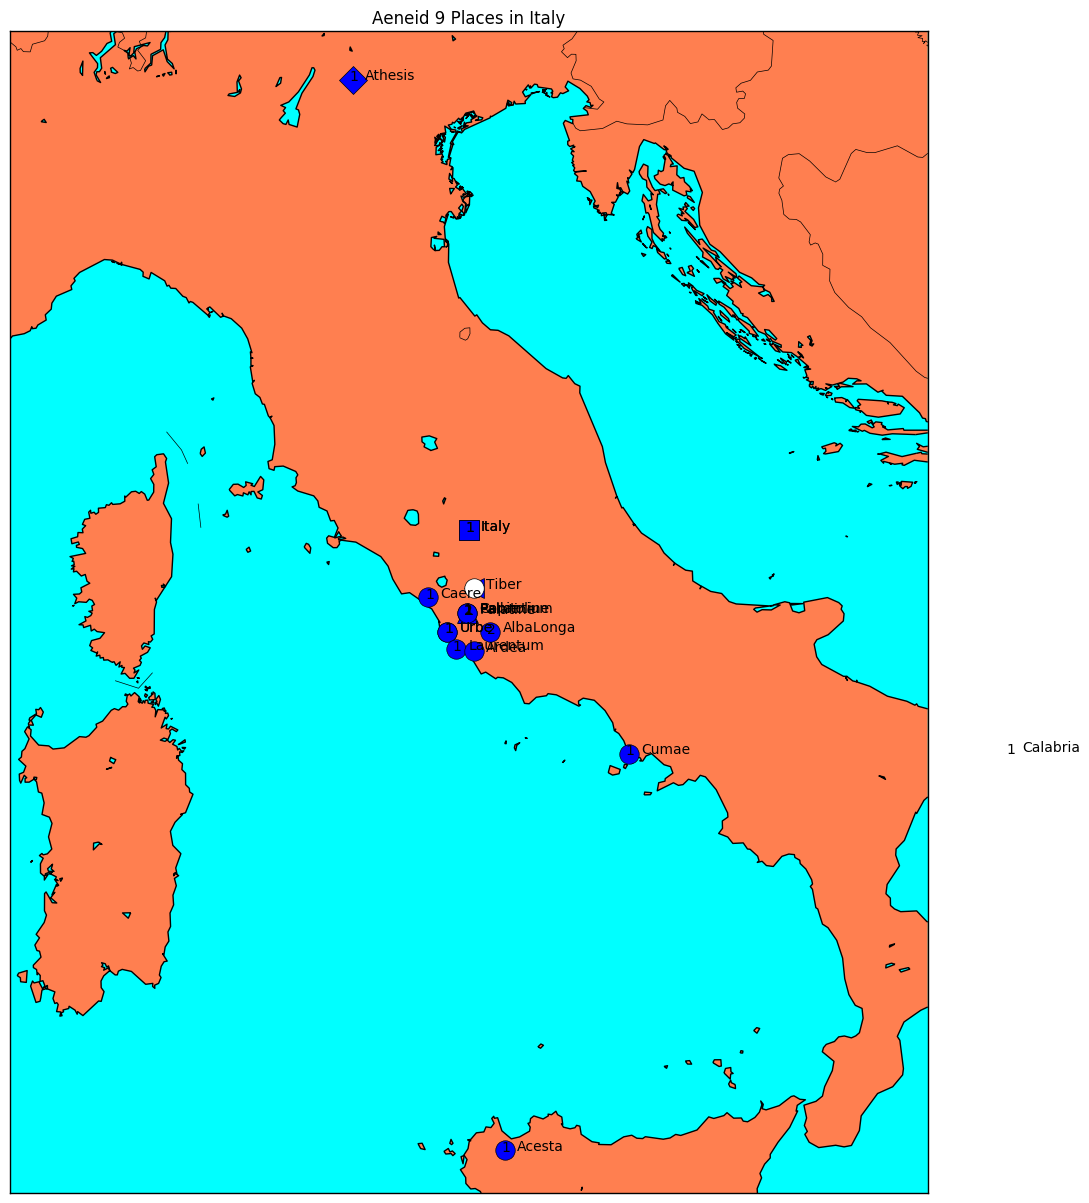

In [5]:
aen9italymap = Basemap(projection='cass', resolution = 'i', area_thresh = 0.1, lon_0 = 12.5, lat_0 = 41.9, width = 750000, height = 950000)
x, y = aen9italymap(aen9italy['reprLong'].values, aen9italy['reprLat'].values)
labels = aen9italy['Name']
type = aen9italy['Place_Type']
frequencies = aen9italycounts['count']
for frequency, label, xpt, ypt in zip(frequencies, labels, x, y):
        plt.text(xpt-2700, ypt-1000, frequency)
for label, xpt, ypt in zip(labels, x, y):
        plt.text(xpt+10000, ypt, label)
for t, x, y in zip(type, x, y):
    if t == "City/Settlement":
        aen9italymap.plot(x, y, marker='o', color='b', markersize=14)
    elif t == "Region":
        aen9italymap.plot(x, y, marker='s', color='b', markersize=14)
    elif t == "Island":
        aen9italymap.plot(x, y, marker='D', color='b', markersize=14)
    elif t == "Mountain/Hill":
        aen9italymap.plot(x, y, marker='^', color='b', markersize=14)
    elif t == "River":
        aen9italymap.plot(x, y, marker='<', color='b', markersize=14)
    elif t == "Body_of_water":
        aen9italymap.plot(x, y, marker='8', color='b', markersize=14)
    elif t == "Port":
        aen9italymap.plot(x, y, marker='1', color='b', markersize=14) 
aen9italymap.plot(x, y, 'o', color='white', markersize=14)
aen9italymap.drawcoastlines()
aen9italymap.drawcountries()
aen9italymap.fillcontinents(color='coral',lake_color='aqua')
aen9italymap.drawmapboundary(fill_color='aqua')
plt.title("Aeneid 9 Places in Italy")
plt.gcf().set_size_inches(15, 15)
plt.show()
blue_circle = mlines.Line2D([], [], color='blue', marker='o', markersize=12, label='City/Settlements')
blue_square = mlines.Line2D([], [], color='blue', marker='s', markersize=12, label='Region')
blue_diamond = mlines.Line2D([], [], color='blue', marker='D', markersize=12, label='Island')
blue_triangle_up = mlines.Line2D([], [], color='blue', marker='^', markersize=12, label='Mountain/Hill')
blue_arrow_left = mlines.Line2D([], [], color='blue', marker='<', markersize=12, label='River')
blue_octagon = mlines.Line2D([], [], color='blue', marker='8', markersize=12, label='Body of Water')
blue_tri_down = mlines.Line2D([], [], color='blue', marker='1', markersize=12, label='Port')
plt.legend(handles=[blue_circle, blue_square, blue_diamond, blue_triangle_up, blue_arrow_left, blue_octagon, blue_tri_down,])

# Map of Aeneid 10, with closeup on Italy
Just as Aeneid 1 was intended to serve as an introduction to the use of place in the "Oddessy half" of the Aeneid, book 10 may serve as a sample for the "Iliad half." As we can see below, even in book that is predominately battle narrative, there is far more geographics scope, and a much greater variety of local place names, than in Homer. 

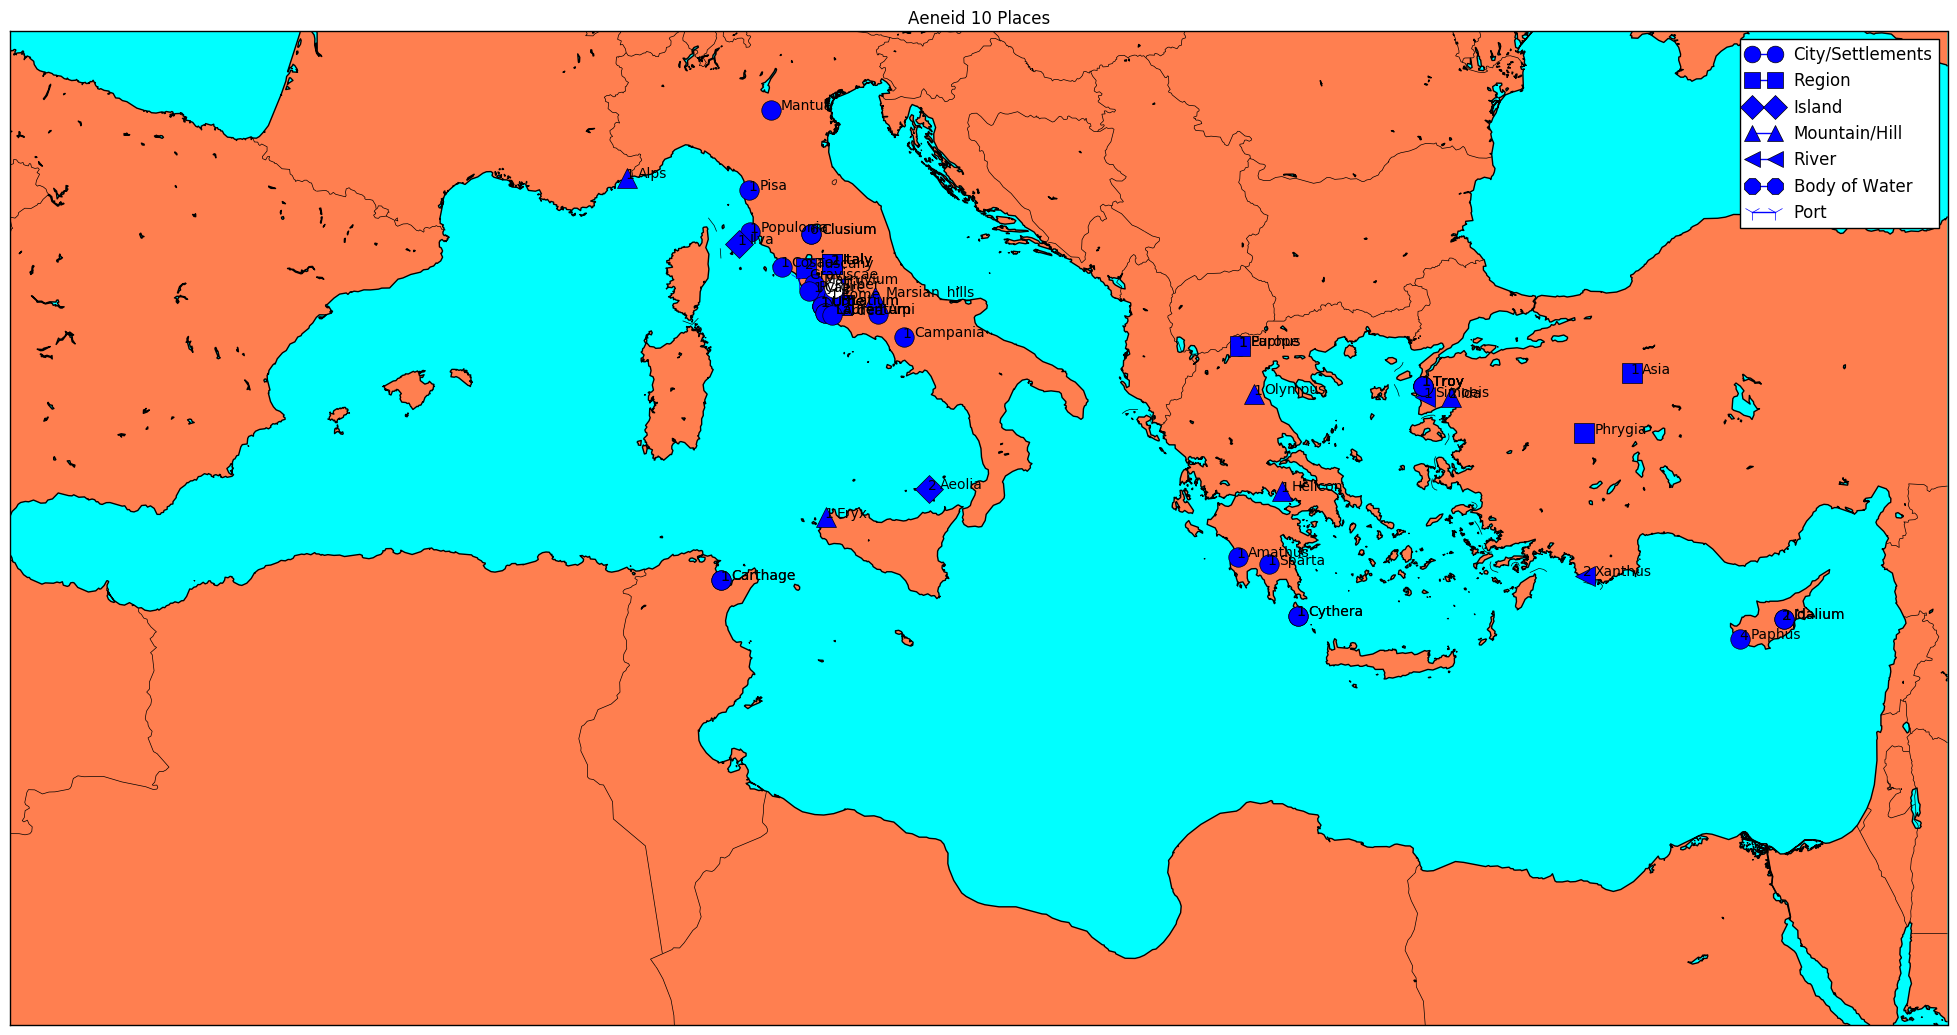

In [6]:
aen10map = Basemap(projection='cass', resolution = 'i', area_thresh = 0.1, lon_0 = 16, lat_0 = 37.9, width = 3800000, height = 1950000)
x, y = aen10map(aen10['reprLong'].values, aen10['reprLat'].values)
labels = aen10['Name']
type = aen10['Place_Type']
frequencies = aen10counts['count']
for frequency, label, xpt, ypt in zip(frequencies, labels, x, y):
        plt.text(xpt-2700, ypt-1000, frequency)
for label, xpt, ypt in zip(labels, x, y):
        plt.text(xpt+20000, ypt, label)
for t, x, y in zip(type, x, y):
    if t == "City/Settlement":
        aen10map.plot(x, y, marker='o', color='b', markersize=14)
    elif t == "Region":
        aen10map.plot(x, y, marker='s', color='b', markersize=14)
    elif t == "Island":
        aen10map.plot(x, y, marker='D', color='b', markersize=14)
    elif t == "Mountain/Hill":
        aen10map.plot(x, y, marker='^', color='b', markersize=14)
    elif t == "River":
        aen10map.plot(x, y, marker='<', color='b', markersize=14)
    elif t == "Body_of_water":
        aen10map.plot(x, y, marker='8', color='b', markersize=14)
    elif t == "Port":
        aen10map.plot(x, y, marker='1', color='b', markersize=14) 
aen10map.plot(x, y, 'o', color='white', markersize=14)
aen10map.drawcoastlines()
aen10map.drawcountries()
aen10map.fillcontinents(color='coral',lake_color='aqua')
aen10map.drawmapboundary(fill_color='aqua')
plt.title("Aeneid 10 Places")
plt.gcf().set_size_inches(25,25)
plt.show()
blue_circle = mlines.Line2D([], [], color='blue', marker='o', markersize=12, label='City/Settlements')
blue_square = mlines.Line2D([], [], color='blue', marker='s', markersize=12, label='Region')
blue_diamond = mlines.Line2D([], [], color='blue', marker='D', markersize=12, label='Island')
blue_triangle_up = mlines.Line2D([], [], color='blue', marker='^', markersize=12, label='Mountain/Hill')
blue_arrow_left = mlines.Line2D([], [], color='blue', marker='<', markersize=12, label='River')
blue_octagon = mlines.Line2D([], [], color='blue', marker='8', markersize=12, label='Body of Water')
blue_tri_down = mlines.Line2D([], [], color='blue', marker='1', markersize=12, label='Port')
plt.legend(handles=[blue_circle, blue_square, blue_diamond, blue_triangle_up, blue_arrow_left, blue_octagon, blue_tri_down,])


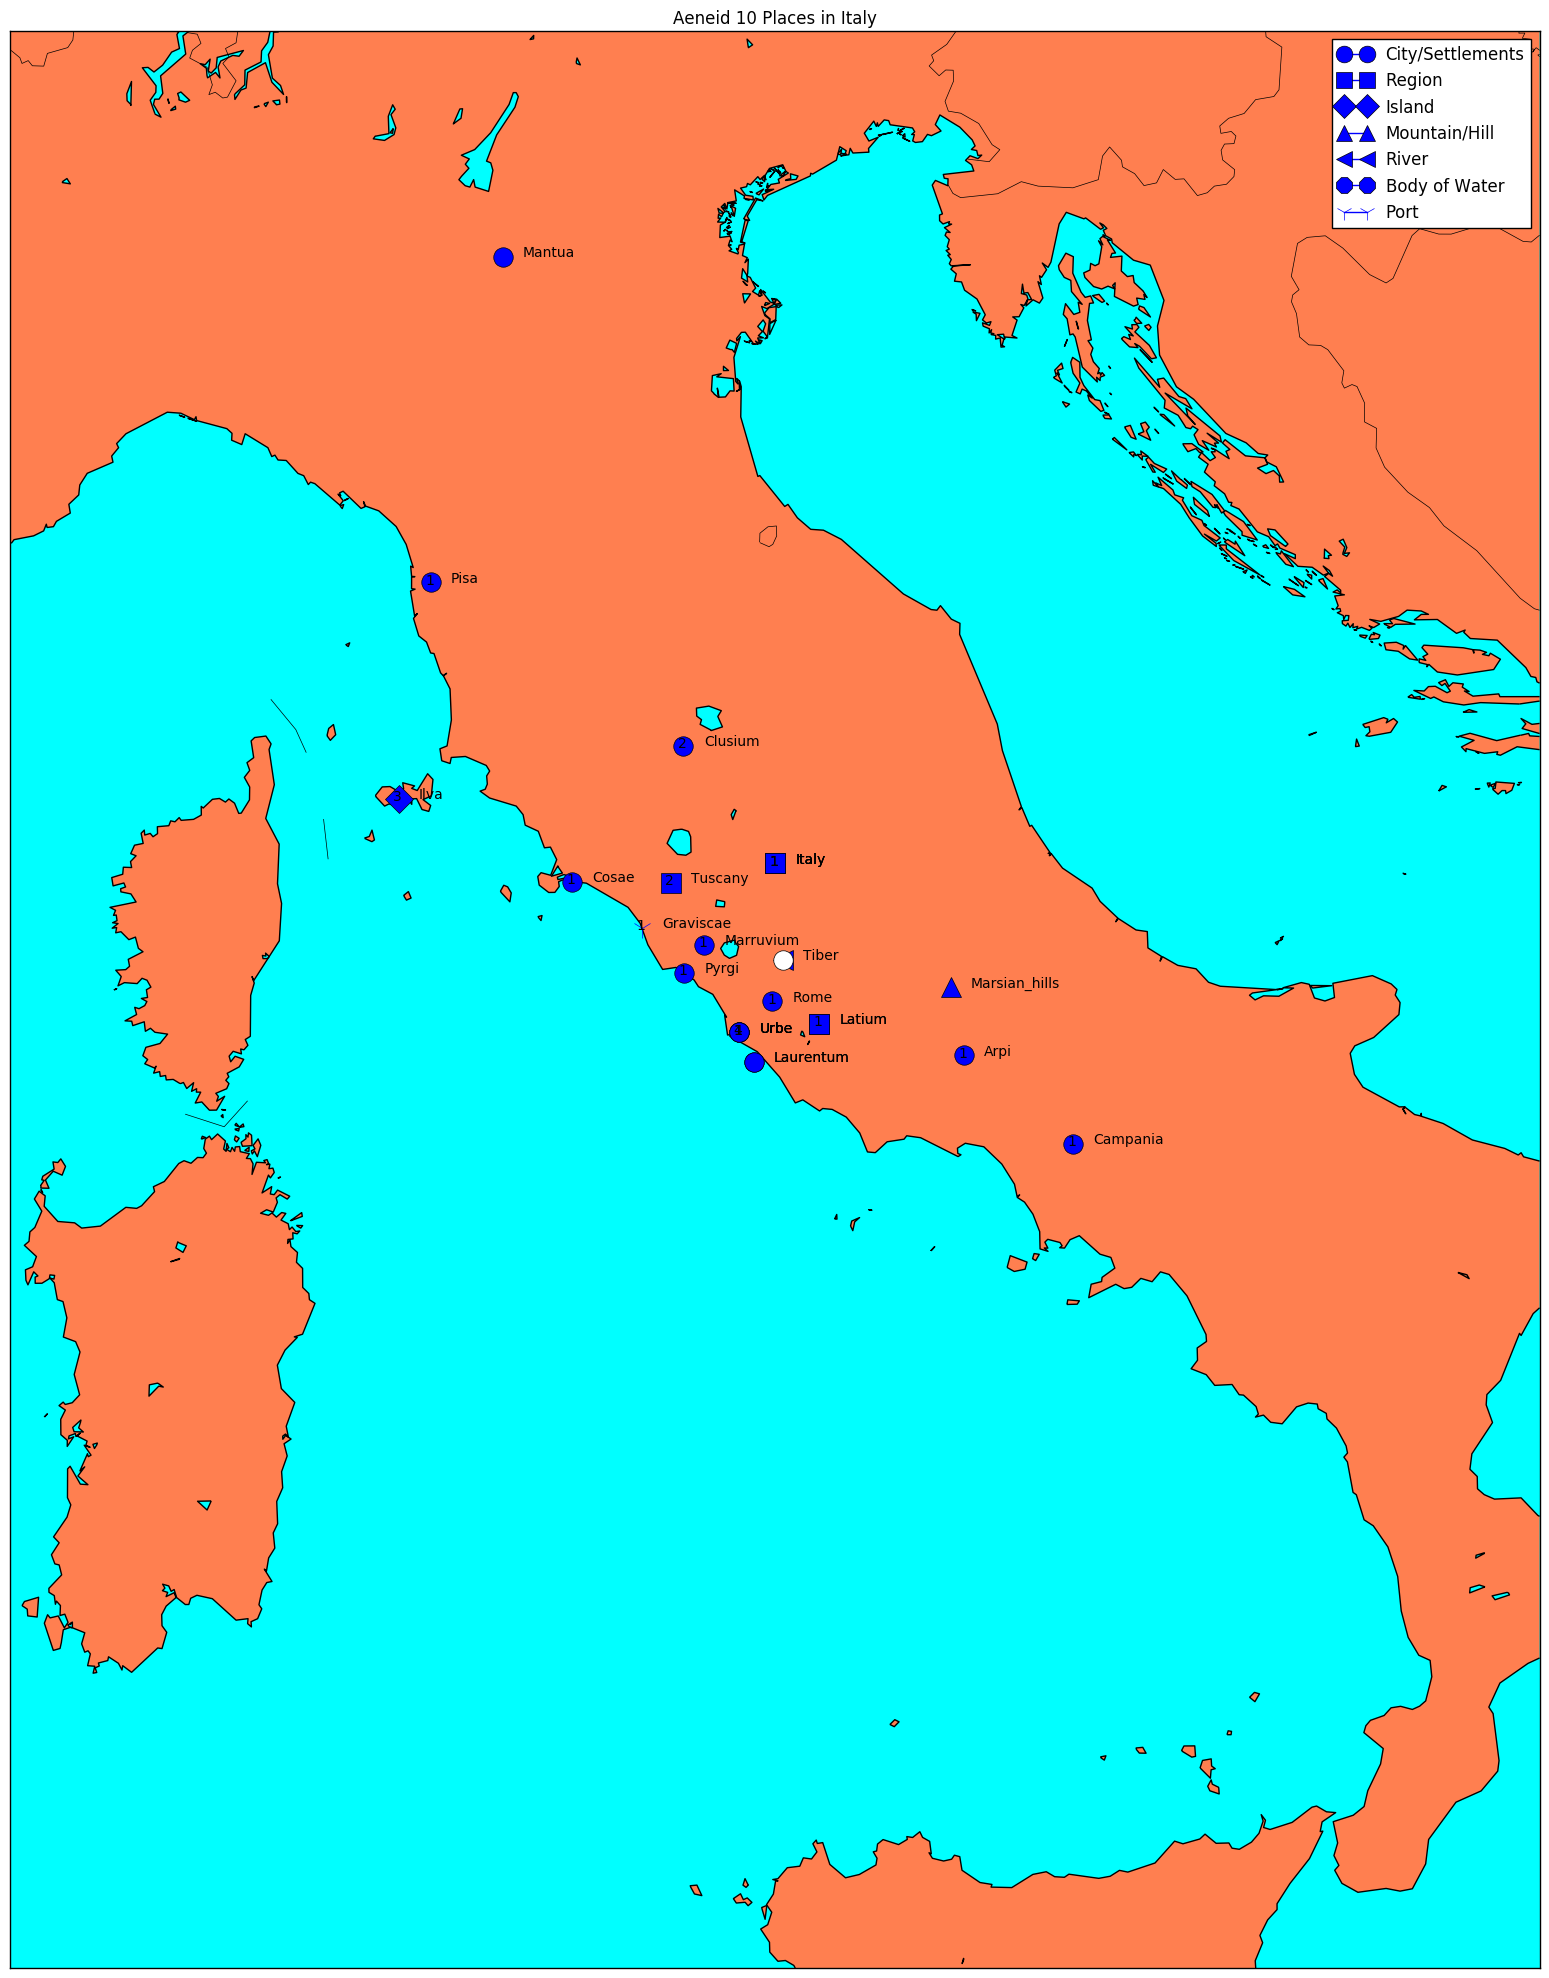

In [8]:
aen10italymap = Basemap(projection='cass', resolution = 'i', area_thresh = 0.1, lon_0 = 12.5, lat_0 = 41.9, width = 750000, height = 950000)
x, y = aen10italymap(aen10italy['reprLong'].values, aen10italy['reprLat'].values)
labels = aen10italy['Name']
type = aen10italy['Place_Type']
frequencies = aen10italycounts['count']
for frequency, label, xpt, ypt in zip(frequencies, labels, x, y):
        plt.text(xpt-2700, ypt-1000, frequency)
for label, xpt, ypt in zip(labels, x, y):
        plt.text(xpt+10000, ypt, label)
for t, x, y in zip(type, x, y):
    if t == "City/Settlement":
        aen10italymap.plot(x, y, marker='o', color='b', markersize=14)
    elif t == "Region":
        aen10italymap.plot(x, y, marker='s', color='b', markersize=14)
    elif t == "Island":
        aen10italymap.plot(x, y, marker='D', color='b', markersize=14)
    elif t == "Mountain/Hill":
        aen10italymap.plot(x, y, marker='^', color='b', markersize=14)
    elif t == "River":
        aen10italymap.plot(x, y, marker='<', color='b', markersize=14)
    elif t == "Body_of_water":
        aen10italymap.plot(x, y, marker='8', color='b', markersize=14)
    elif t == "Port":
        aen10italymap.plot(x, y, marker='1', color='b', markersize=14) 
aen10italymap.plot(x, y, 'o', color='white', markersize=14)
aen10italymap.drawcoastlines()
aen10italymap.drawcountries()
aen10italymap.fillcontinents(color='coral',lake_color='aqua')
aen10italymap.drawmapboundary(fill_color='aqua')
plt.title("Aeneid 10 Places in Italy")
plt.gcf().set_size_inches(25,25)
plt.show()
blue_circle = mlines.Line2D([], [], color='blue', marker='o', markersize=12, label='City/Settlements')
blue_square = mlines.Line2D([], [], color='blue', marker='s', markersize=12, label='Region')
blue_diamond = mlines.Line2D([], [], color='blue', marker='D', markersize=12, label='Island')
blue_triangle_up = mlines.Line2D([], [], color='blue', marker='^', markersize=12, label='Mountain/Hill')
blue_arrow_left = mlines.Line2D([], [], color='blue', marker='<', markersize=12, label='River')
blue_octagon = mlines.Line2D([], [], color='blue', marker='8', markersize=12, label='Body of Water')
blue_tri_down = mlines.Line2D([], [], color='blue', marker='1', markersize=12, label='Port')
plt.legend(handles=[blue_circle, blue_square, blue_diamond, blue_triangle_up, blue_arrow_left, blue_octagon, blue_tri_down,])

# Map of the Shield of Aeneas
Again, in the shield depiction, we see the sort of global vision that people expect from the "cosmic" epic poem about Rome in the world. Though it is interesting to note that the sort of macroscopic vision of the empire we see on the shield is in fact notably less common in the sample books we've surveyed. 

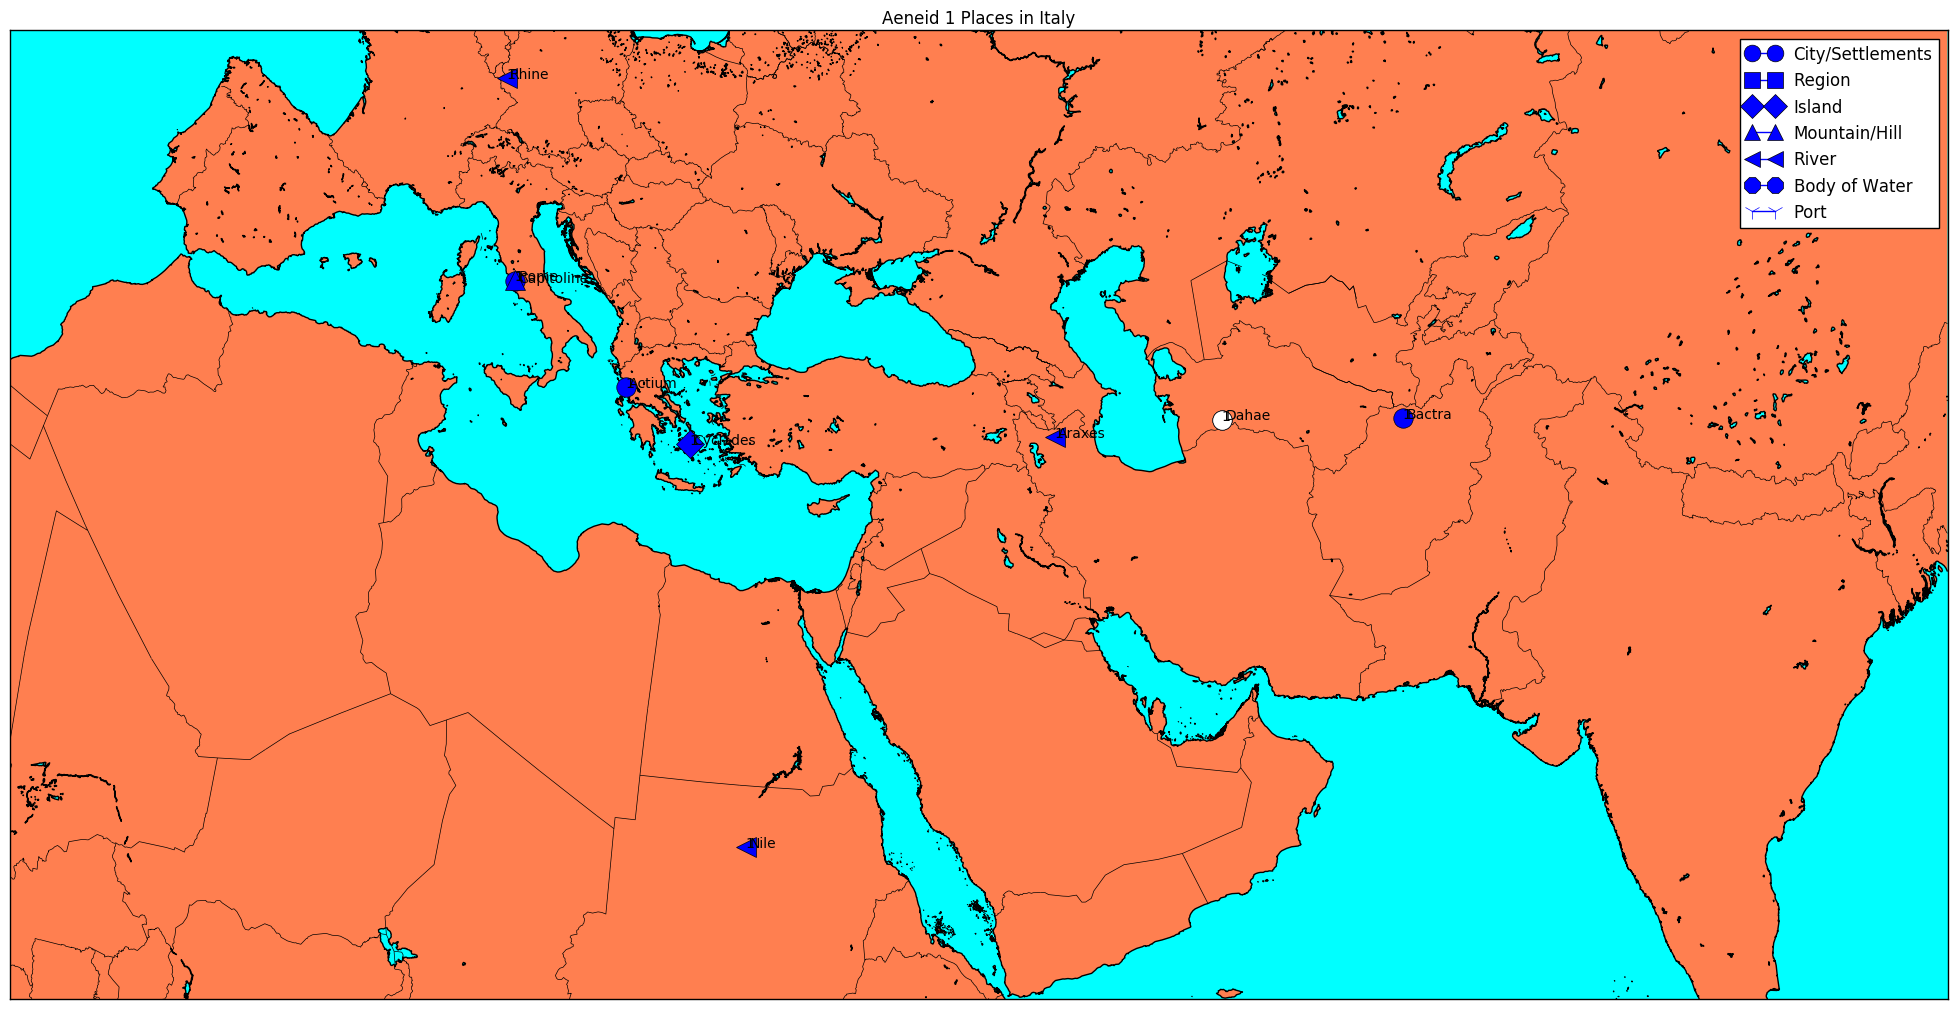

In [4]:
shieldmap = Basemap(projection='cass', resolution = 'i', area_thresh = 0.1, lon_0 = 42, lat_0 = 35, width = 10000000, height = 5000000)
x, y = shieldmap(shield['reprLong'].values, shield['reprLat'].values)
labels = shield['Name']
type = shield['Place_Type']
frequencies = shieldcounts['count']
for frequency, label, xpt, ypt in zip(frequencies, labels, x, y):
        plt.text(xpt-2700, ypt-1000, frequency)
for label, xpt, ypt in zip(labels, x, y):
    if label == 'Capitoline':
        plt.text(xpt+18000, ypt-10000, label)
    else: 
        plt.text(xpt+18000, ypt, label)
for t, x, y in zip(type, x, y):
    if t == "City/Settlement":
        shieldmap.plot(x, y, marker='o', color='b', markersize=14)
    elif t == "Region":
        shieldmap.plot(x, y, marker='s', color='b', markersize=14)
    elif t == "Island":
        shieldmap.plot(x, y, marker='D', color='b', markersize=14)
    elif t == "Mountain/Hill":
        shieldmap.plot(x, y, marker='^', color='b', markersize=14)
    elif t == "River":
        shieldmap.plot(x, y, marker='<', color='b', markersize=14)
    elif t == "Body_of_water":
        shieldmap.plot(x, y, marker='8', color='b', markersize=14)
    elif t == "Port":
        shieldmap.plot(x, y, marker='1', color='b', markersize=14) 
shieldmap.plot(x, y, 'o', color='white', markersize=14)
shieldmap.drawcoastlines()
shieldmap.drawcountries()
shieldmap.fillcontinents(color='coral',lake_color='aqua')
shieldmap.drawmapboundary(fill_color='aqua')
plt.title("Aeneid 1 Places in Italy")
plt.gcf().set_size_inches(25,25)
plt.show()
blue_circle = mlines.Line2D([], [], color='blue', marker='o', markersize=12, label='City/Settlements')
blue_square = mlines.Line2D([], [], color='blue', marker='s', markersize=12, label='Region')
blue_diamond = mlines.Line2D([], [], color='blue', marker='D', markersize=12, label='Island')
blue_triangle_up = mlines.Line2D([], [], color='blue', marker='^', markersize=12, label='Mountain/Hill')
blue_arrow_left = mlines.Line2D([], [], color='blue', marker='<', markersize=12, label='River')
blue_octagon = mlines.Line2D([], [], color='blue', marker='8', markersize=12, label='Body of Water')
blue_tri_down = mlines.Line2D([], [], color='blue', marker='1', markersize=12, label='Port')
plt.legend(handles=[blue_circle, blue_square, blue_diamond, blue_triangle_up, blue_arrow_left, blue_octagon, blue_tri_down,])

# Map of Iliad 16
Iliad 16, with much fewer place names and much smaller regional spread, may serve as a comparision with the Aeneid. It is worth noting that in the Iliad it is very common to mention peoples (e.g. the Phthians) in such a way as, it could be argued, metonymously stand for place in the poem. But these also occur in the Aeneid, and were counted here in neither case. 

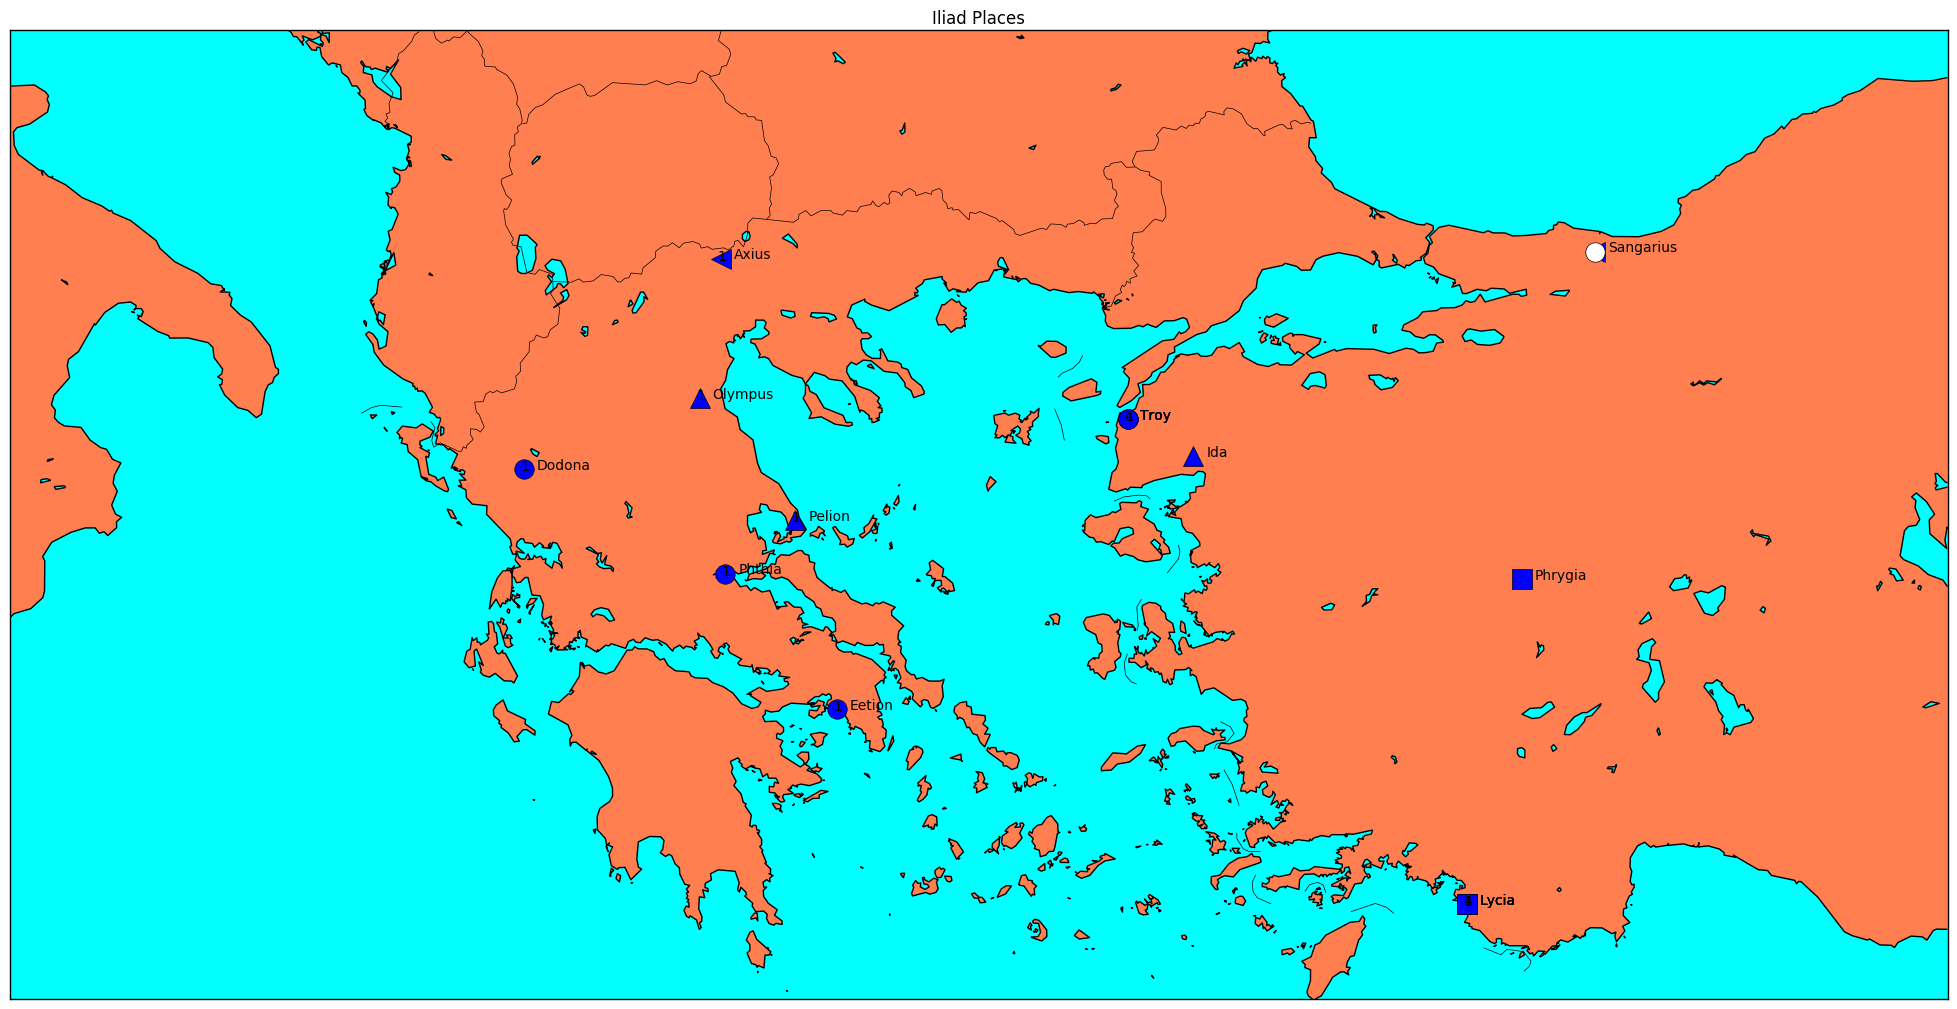

In [3]:
ilimap = Basemap(projection='cass', resolution = 'i', area_thresh = 0.1, lon_0 = 24.9, lat_0 = 39.3, width = 1500000, height = 750000)
x, y = ilimap(ili['reprLong'].values, ili['reprLat'].values)
labels = ili['Name']
type = ili['Place_Type']
frequencies = ilicounts['count']
for frequency, label, xpt, ypt in zip(frequencies, labels, x, y):
        plt.text(xpt-2700, ypt-1000, frequency)
for label, xpt, ypt in zip(labels, x, y):
        plt.text(xpt+10000, ypt, label)
for t, x, y in zip(type, x, y):
    if t == "City/Settlement":
        ilimap.plot(x, y, marker='o', color='b', markersize=14)
    elif t == "Region":
        ilimap.plot(x, y, marker='s', color='b', markersize=14)
    elif t == "Island":
        ilimap.plot(x, y, marker='D', color='b', markersize=14)
    elif t == "Mountain/Hill":
        ilimap.plot(x, y, marker='^', color='b', markersize=14)
    elif t == "River":
        ilimap.plot(x, y, marker='<', color='b', markersize=14)
    elif t == "Body_of_water":
        ilimap.plot(x, y, marker='8', color='b', markersize=14)
    elif t == "Port":
        ilimap.plot(x, y, marker='1', color='b', markersize=14) 
ilimap.plot(x, y, 'o', color='white', markersize=14)
ilimap.drawcoastlines()
ilimap.drawcountries()
ilimap.fillcontinents(color='coral',lake_color='aqua')
ilimap.drawmapboundary(fill_color='aqua')
plt.title("Iliad Places")
plt.gcf().set_size_inches(25,25)
plt.show()
blue_circle = mlines.Line2D([], [], color='blue', marker='o', markersize=12, label='City/Settlements')
blue_square = mlines.Line2D([], [], color='blue', marker='s', markersize=12, label='Region')
blue_diamond = mlines.Line2D([], [], color='blue', marker='D', markersize=12, label='Island')
blue_triangle_up = mlines.Line2D([], [], color='blue', marker='^', markersize=12, label='Mountain/Hill')
blue_arrow_left = mlines.Line2D([], [], color='blue', marker='<', markersize=12, label='River')
blue_octagon = mlines.Line2D([], [], color='blue', marker='8', markersize=12, label='Body of Water')
blue_tri_down = mlines.Line2D([], [], color='blue', marker='1', markersize=12, label='Port')
plt.legend(handles=[blue_circle, blue_square, blue_diamond, blue_triangle_up, blue_arrow_left, blue_octagon, blue_tri_down,])

# Comparison of Iliad 16 and Aeneid 10

In [ ]:
aenilimap = Basemap(projection='cass', resolution = 'i', area_thresh = 0.1, lon_0 = 42, lat_0 = 35, width = 10000000, height = 5000000)
x, y = aenilimap(aenil['reprLong'].values, aenil['reprLat'].values)
labels = aenil['Name']
type = aenil['Book']
frequencies = aenilcounts['count']
for frequency, label, xpt, ypt in zip(frequencies, labels, x, y):
        plt.text(xpt-2700, ypt-1000, frequency)
for label, xpt, ypt in zip(labels, x, y):
        plt.text(xpt+10000, ypt, label)
for t, x, y in zip(type, x, y):
    if t == "Aeneid_10":
        aenilimap.plot(x, y, marker='o', color='w', markersize=14)
    elif t == "Iliad_16":
        aenilimap.plot(x, y, marker='1', color='b', markersize=14) 
    else: 
        aenilimap.plot(x, y, marker='1', color='r', markersize=14)
aenilimap.plot(x, y, 'o', color='white', markersize=14)
aenilimap.drawcoastlines()
aenilimap.drawcountries()
aenilimap.fillcontinents(color='coral',lake_color='aqua')
aenilimap.drawmapboundary(fill_color='aqua')
plt.title("Aeneid 10 and Iliad 16")
plt.gcf().set_size_inches(25,25)
plt.show()
blue_circle = mlines.Line2D([], [], color='blue', marker='o', markersize=12, label='City/Settlements')
blue_square = mlines.Line2D([], [], color='blue', marker='s', markersize=12, label='Region')
blue_diamond = mlines.Line2D([], [], color='blue', marker='D', markersize=12, label='Island')
blue_triangle_up = mlines.Line2D([], [], color='blue', marker='^', markersize=12, label='Mountain/Hill')
blue_arrow_left = mlines.Line2D([], [], color='blue', marker='<', markersize=12, label='River')
blue_octagon = mlines.Line2D([], [], color='blue', marker='8', markersize=12, label='Body of Water')
blue_tri_down = mlines.Line2D([], [], color='blue', marker='1', markersize=12, label='Port')
plt.legend(handles=[blue_circle, blue_square, blue_diamond, blue_triangle_up, blue_arrow_left, blue_octagon, blue_tri_down,])

Where I want to go from here is to continue developing these maps. Links to Carto animated maps, found here, represent the most mature iteration of the mapping for this project. 

Aeneid 1 animated map https://delmaticic.carto.com/viz/062bdba6-ba36-11e6-8053-0e3ff518bd15/map
Aeneid 9 animated map https://delmaticic.carto.com/viz/989bd55d-dd50-43a6-8e98-1d682ee01732/map
Aeneid 10 animated map https://delmaticic.carto.com/viz/cce84f20-4546-4235-9fba-124b974d764e/map